# Visualization

### UMAP visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[INFO] Computing token frequencies from: ../data/kr_train.bin
[OK] Frequency computation completed. Unique tokens: 1156
[INFO] Loading chapter metadata...
[INFO] Loading model from ../ckpt.pt...
[INFO] Running UMAP...


/home/user02/miniconda3/envs/gpt/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[INFO] Rendering scatter plot...


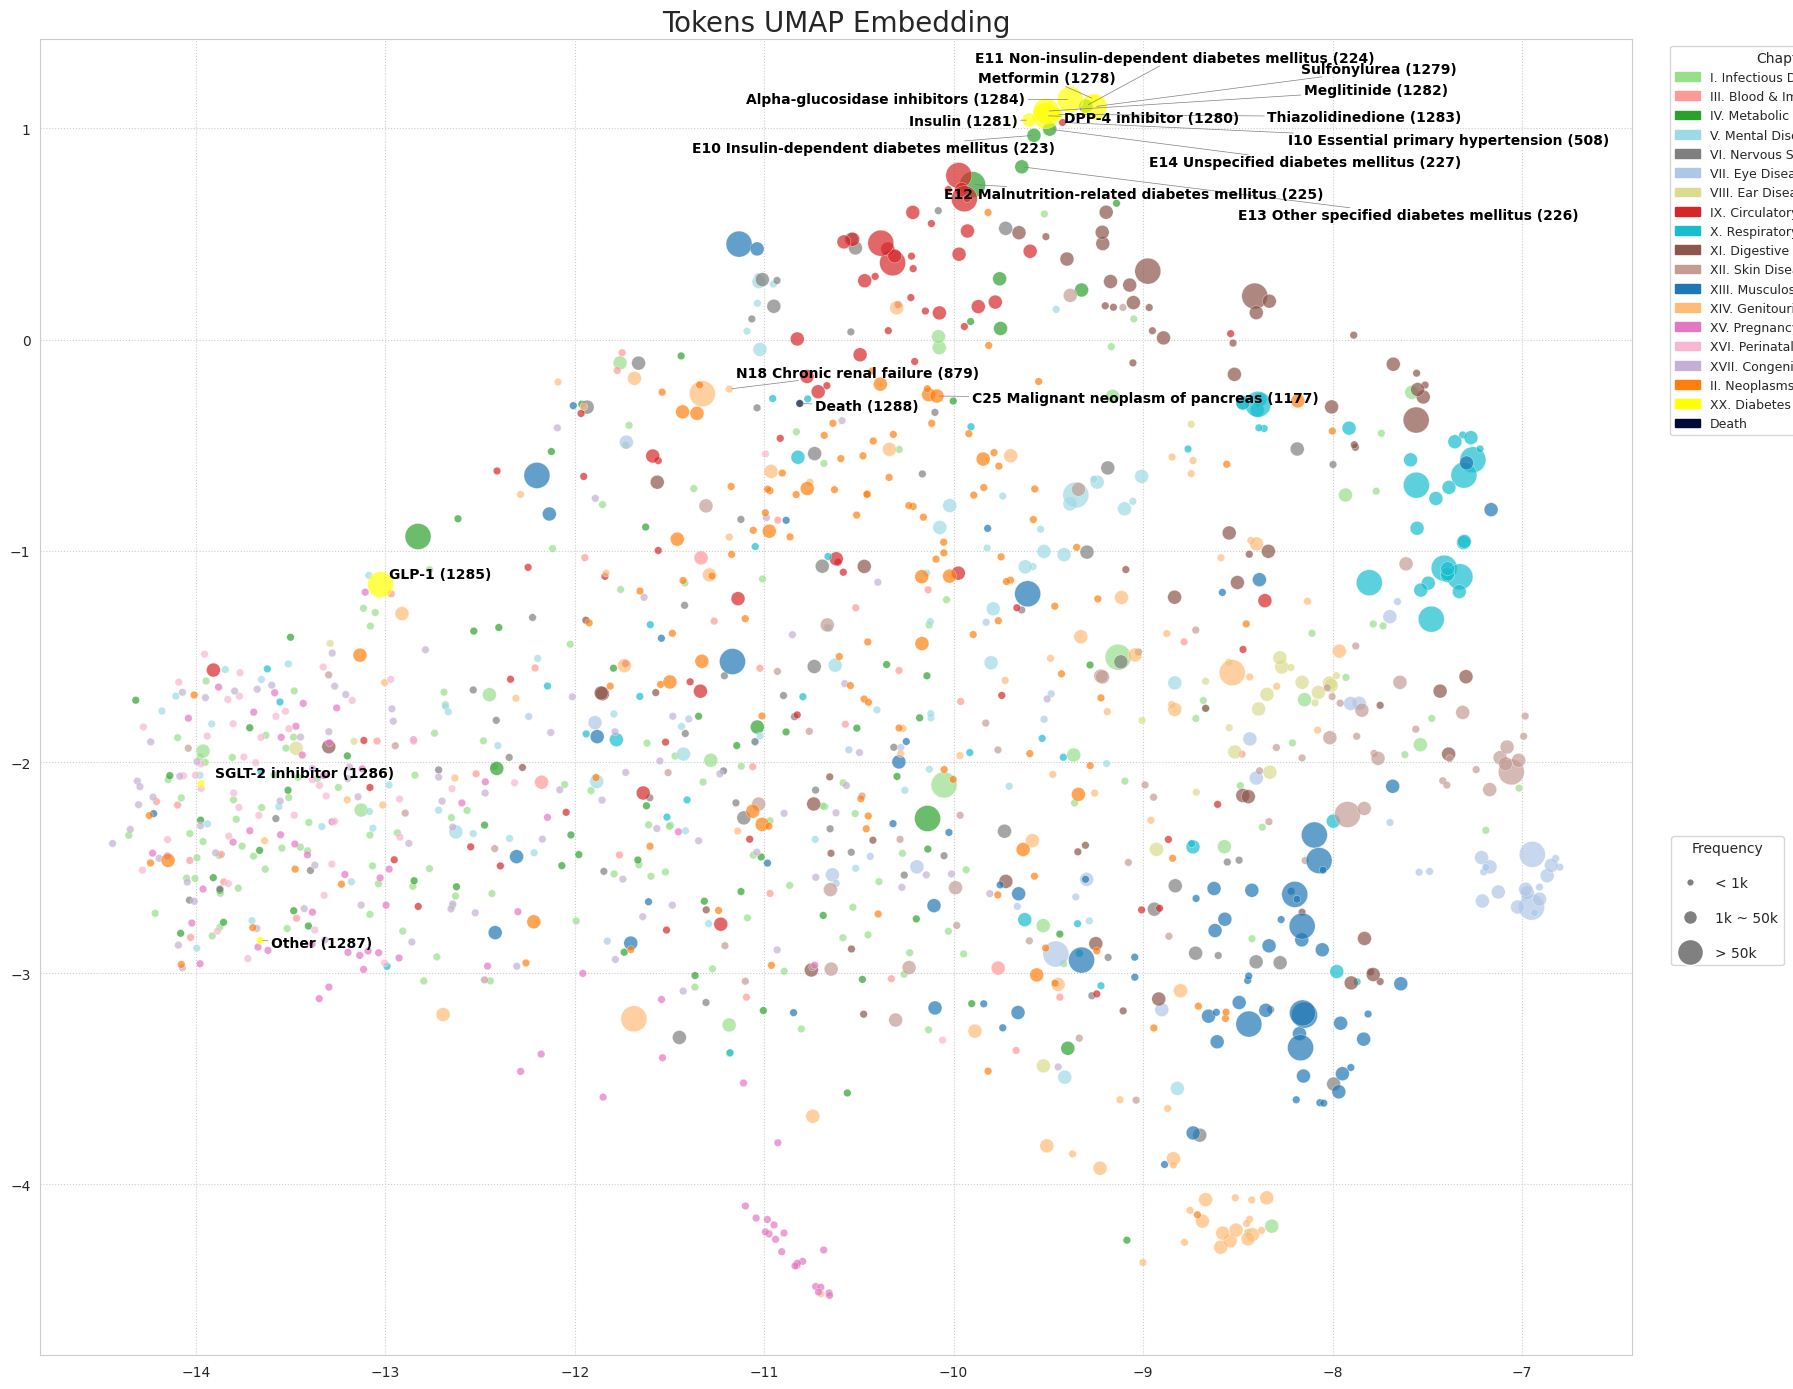

In [12]:
# =========================================================
# 1. Environment setup & module autoreload
# =========================================================
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import matplotlib.pyplot as plt
from utils_umap import (
    load_token_frequencies, 
    load_chapter_metadata, 
    get_embeddings, 
    run_umap, 
    draw_umap_plot
)

# =========================================================
# 2. Paths & configuration
# =========================================================
BASE_DIR = ".."
CKPT_PATH = "../ckpt.pt"
LABELS_PATH = os.path.join(BASE_DIR, "data/labels_chapter.csv")
DATA_BIN_PATH = os.path.join(BASE_DIR, "data/kr_train.bin")

# Token IDs to be explicitly labeled on the UMAP plot
TARGET_IDS = [223, 224, 225, 226, 227, 508, 879, 1177, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289] 

# =========================================================
# 3. Data loading & preprocessing
#    (Run once unless inputs change)
# =========================================================
# (1) Compute token frequencies from binary training data
token_counts = load_token_frequencies(DATA_BIN_PATH)

# (2) Load token-to-chapter metadata
token_meta, legend_info = load_chapter_metadata(LABELS_PATH)

# (3) Extract token embeddings from the trained model checkpoint
embeddings, valid_token_ids = get_embeddings(CKPT_PATH, token_meta)

# (4) Run UMAP dimensionality reduction
umap_result = run_umap(embeddings, n_neighbors=15, min_dist=0.1)


# ==========================================
# 4. Visualization
#    (Safe to rerun with different plotting parameters)
# ==========================================
fig = draw_umap_plot(
    embedding_2d=umap_result,
    valid_token_ids=valid_token_ids,
    token_meta=token_meta,
    token_counts=token_counts,
    legend_info=legend_info,
    target_label_ids=TARGET_IDS  # Change this list to label different tokens
)

plt.show()

# To save the figure:
# fig.savefig("umap_final_result.png", dpi=300, bbox_inches="tight")

### AUC boxplot visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[INFO] Loading metadata from: ../data/labels_chapter.csv
Metadata loaded successfully.

>>> Processing: Internal Validation (val_df_both.csv)
    Data shape: (758, 12)


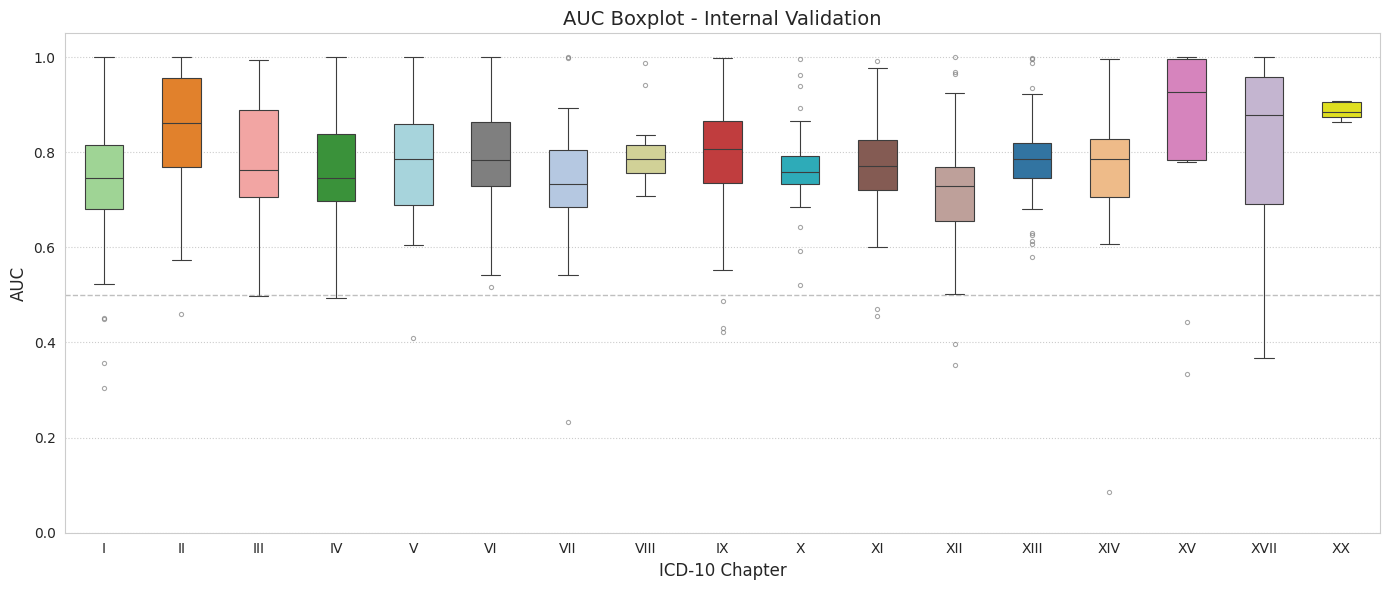


>>> Processing: Internal Test (test_df_both.csv)
    Data shape: (709, 12)


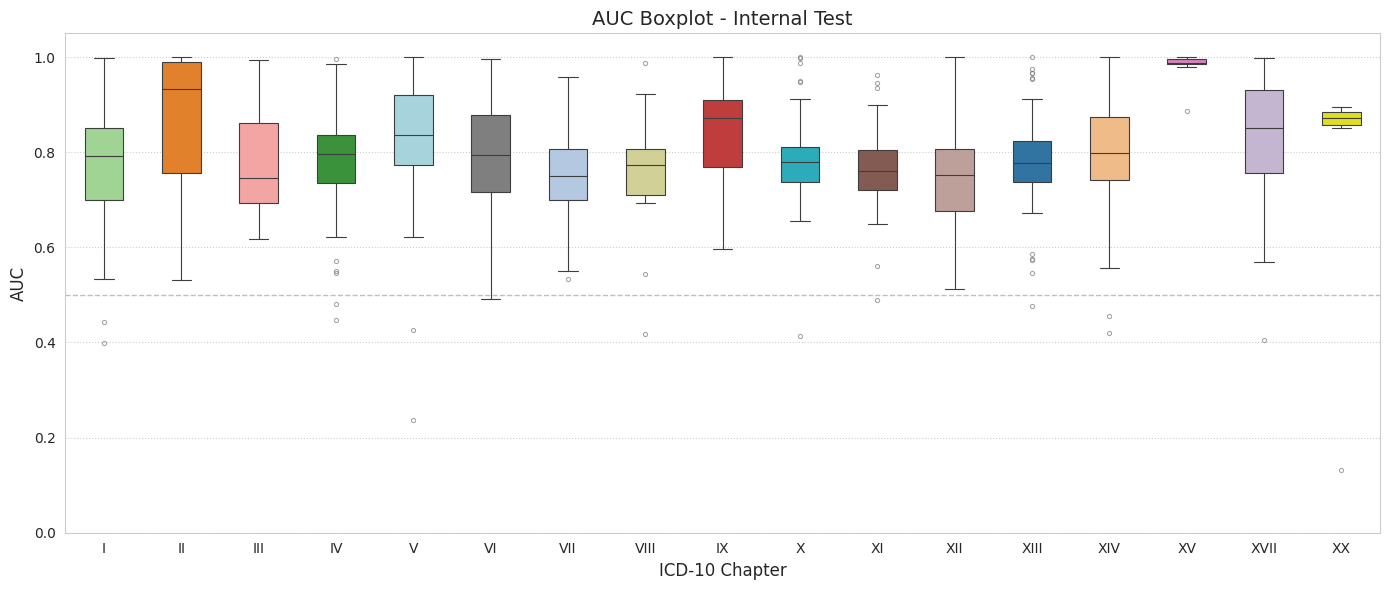


>>> Processing: External Validation 1 (extval_jmdc_df_both.csv)
    Data shape: (740, 12)


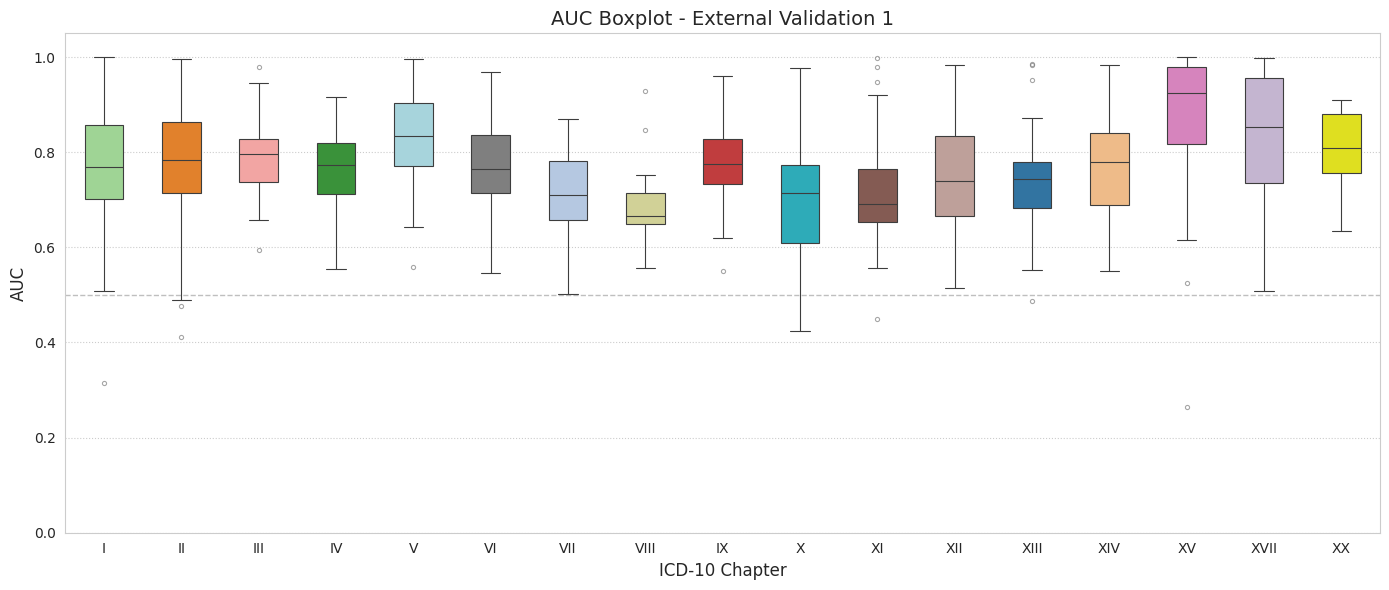


>>> Processing: External Validation 2 (extval_ukb_df_both.csv)
    Data shape: (935, 12)


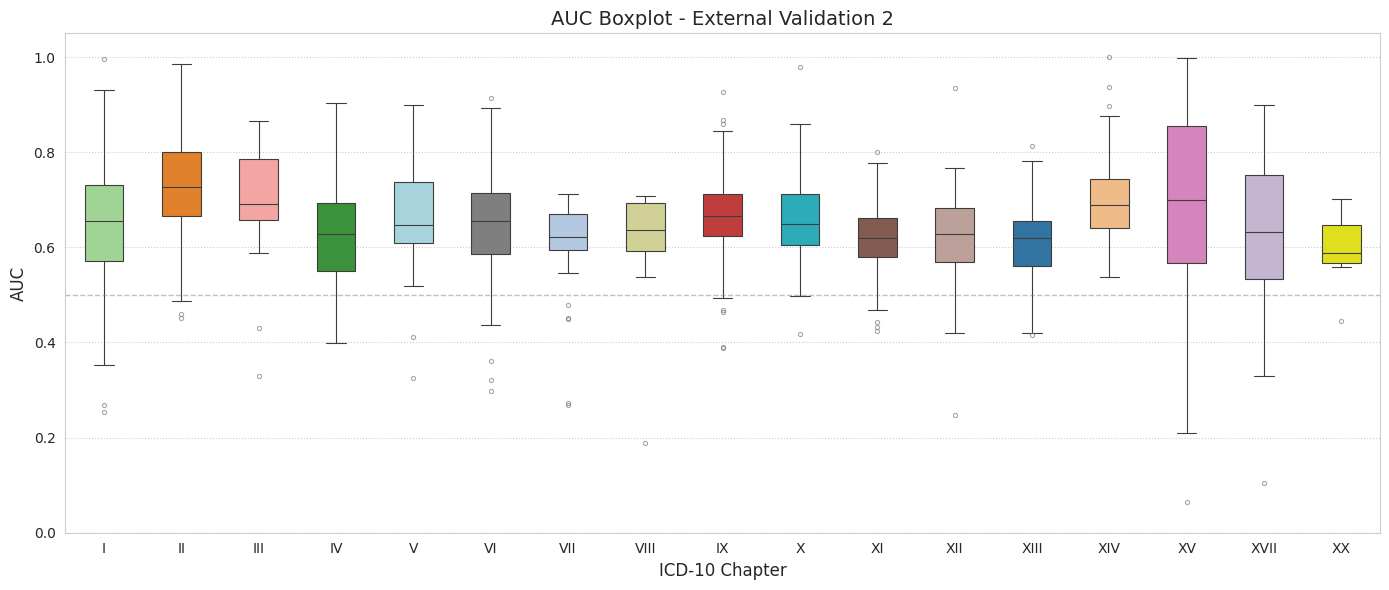

In [9]:
# =========================================================
# 1. Environment setup
# =========================================================
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import matplotlib.pyplot as plt
from utils_boxplot import (
    DATASET_MAP, 
    load_chapter_metadata, 
    load_dataset, 
    draw_boxplot
)

# =========================================================
# 2. Path configuration
# =========================================================
# This notebook is located in /gpt/figure,
# so data and results are referenced from the parent directory.
BASE_DIR = ".."
LABELS_PATH = os.path.join(BASE_DIR, "data/labels_chapter.csv")
RESULT_DIR = os.path.join(BASE_DIR, "results")

# =========================================================
# 3. Load shared metadata
# =========================================================
try:
    chapter_df, color_palette = load_chapter_metadata(LABELS_PATH)
    print("Metadata loaded successfully.")
except Exception as e:
    print("Stop execution.")
    chapter_df = None

# =========================================================
# 4. Iterate over datasets and generate boxplots
# =========================================================
if chapter_df is not None:
    # Target datasets to visualize
    # Example:
    # targets = ["val", "test", "ext1", "ext2"]
    targets = DATASET_MAP.keys() 

    for target in targets:
        title_text, filename = DATASET_MAP[target]
        print(f"\n>>> Processing: {title_text} ({filename})")
        
        # Load dataset
        df = load_dataset(RESULT_DIR, filename, chapter_df)
        
        if df is not None and not df.empty:
            print(f"    Data shape: {df.shape}")
            
            # Draw boxplot
            fig = draw_boxplot(df, color_palette, title=f"AUC Boxplot - {title_text}")
            
            # Display in notebook
            plt.show()
            
            # (Optional) Save figure
            # fig.savefig(f"boxplot_{target}.png", dpi=300, bbox_inches="tight")
            
        else:
            print(f"    [WARN] Skipped {target}: No data found.")